# Bank Marketing Dataset - Classification

Dataset yang akan digunakan bersumber dari https://www.kaggle.com/janiobachmann/bank-marketing-dataset . 

Berikut ini merupakan deskripsi variabel yang ada pada - Bank marketing Dataset 

**Data Client Bank** :
1.   age : (numerik)
2.   job: jenis pekerjaan (kategori: 'admin.', 'blue collar', 'pengusaha', 'pembantu rumah tangga', 'manajemen', 'pensiunan', 'wiraswasta', 'layanan', 'pelajar' , 'teknisi', 'menganggur', 'tidak diketahui')
3. marital: status perkawinan (kategorikal: 'bercerai', 'menikah', 'lajang', 'tidak diketahui'; catatan: 'cerai' berarti bercerai atau janda)
4. education: (kategori: primer, sekunder, tersier dan tidak diketahui)
5. default: memiliki kredit dalam default? (kategorikal: 'tidak', 'ya', 'tidak diketahui')
6. housing: memiliki pinjaman perumahan? (kategorikal: 'tidak', 'ya', 'tidak diketahui')
7. loan: memiliki pinjaman pribadi? (kategorikal: 'tidak', 'ya', 'tidak diketahui')
8. balance: Keseimbangan individu.

**Kontrak Campaign** :
9. contact: jenis komunikasi kontak (kategorikal: 'seluler', 'telepon')
10. month: kontak terakhir bulan dalam setahun (kategorikal: 'jan', 'feb', 'mar', ..., 'nov', 'des')
11. day: hari kontak terakhir dalam seminggu (kategorikal: 'mon', 'tue', 'wed', 'thu', 'fri')
12. duration: durasi kontak terakhir, dalam detik (numerik). Catatan penting: atribut ini sangat mempengaruhi target keluaran (misalnya, jika durasi = 0 maka y = 'tidak'). Namun, durasinya tidak diketahui sebelum panggilan dilakukan. Juga, setelah panggilan berakhir, y jelas diketahui. Dengan demikian, input ini hanya boleh dimasukkan untuk tujuan benchmark dan harus dibuang jika tujuannya adalah untuk memiliki model prediksi yang realistis.

**Atribut lainnya**:
13. campaign: jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini (numerik, termasuk kontak terakhir)
14. pday: jumlah hari yang berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya (numerik; 999 berarti klien sebelumnya tidak dihubungi)
15. previous : jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini (numerik)
16. Poutcome: hasil dari kampanye pemasaran sebelumnya (kategorikal: 'kegagalan', 'tidak ada', 'sukses')

**Variabel output (target yang diinginkan)**:
17. deposito : apakah klien telah berlangganan deposito berjangka? (biner: 'yes', 'no')


Target pada dataset ini yaitu variabel deposito. Deposito berjangka adalah simpanan yang ditawarkan oleh bank atau lembaga keuangan dengan suku bunga tetap (seringkali lebih baik daripada hanya membuka rekening simpanan) di mana uang akan dikembalikan kembali pada waktu jatuh tempo tertentu.

**Tujuan**: Menentukan model klasifikasi terbaik untuk mengetahui kelompok di antara populasi sampel yang kemungkinan besar akan membuka rekening deposito berjangka.


# Import Library 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

# Import Data

In [2]:
# Import Data to Google Colab
data= pd.read_csv('https://raw.githubusercontent.com/amaliaristantya/Digital_Talent_Incubator/main/Classification/bank.csv', sep = ',')
data

# Show 5 first Row
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Summary : 

**Mean Age** adalah sekitar 41 tahun. (Minimal: 18 tahun dan Maksimal: 95 tahun.)

**Mean Balance** adalah 1.528. Namun, Standar Deviasi (std) adalah angka yang tinggi sehingga kita dapat memahami bahwa keseimbangan sangat tersebar di seluruh kumpulan data.

Seperti yang dikatakan oleh informasi data, **akan lebih baik untuk menghilangkan kolom duration** karena durasi sangat berkorelasi dengan apakah klien potensial akan membeli deposito berjangka. Selain itu, durasi diperoleh setelah panggilan dilakukan ke klien potensial, jadi jika klien target tidak pernah menerima panggilan, fitur ini tidak terlalu berguna. Alasan mengapa durasi sangat berkorelasi dengan pembukaan deposito berjangka adalah karena semakin banyak bank berbicara dengan klien target, semakin tinggi kemungkinan klien target akan membuka deposito berjangka karena durasi yang lebih tinggi berarti semakin tinggi minat (komitmen) dari klien potensial. .

## Feature dan Target 

In [4]:
data.drop(['duration','contact','month','day','default','pdays',],axis=1,inplace=True)
data.head(5)

,age,job,marital,education,balance,housing,loan,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,2343,yes,no,1,0,unknown,yes
1,56,admin.,married,secondary,45,no,no,1,0,unknown,yes
2,41,technician,married,secondary,1270,yes,no,1,0,unknown,yes
3,55,services,married,secondary,2476,yes,no,1,0,unknown,yes
4,54,admin.,married,tertiary,184,no,no,2,0,unknown,yes


In [5]:
data.shape

(11162, 11)

In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
campaign     0
previous     0
poutcome     0
deposit      0
dtype: int64

Untungnya, tidak ada missing value pada dataset ini. Jika ada nilai yang hilang, kita harus mengisinya dengan median, mean atau mode.

# Explore Data

In [7]:
data.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)

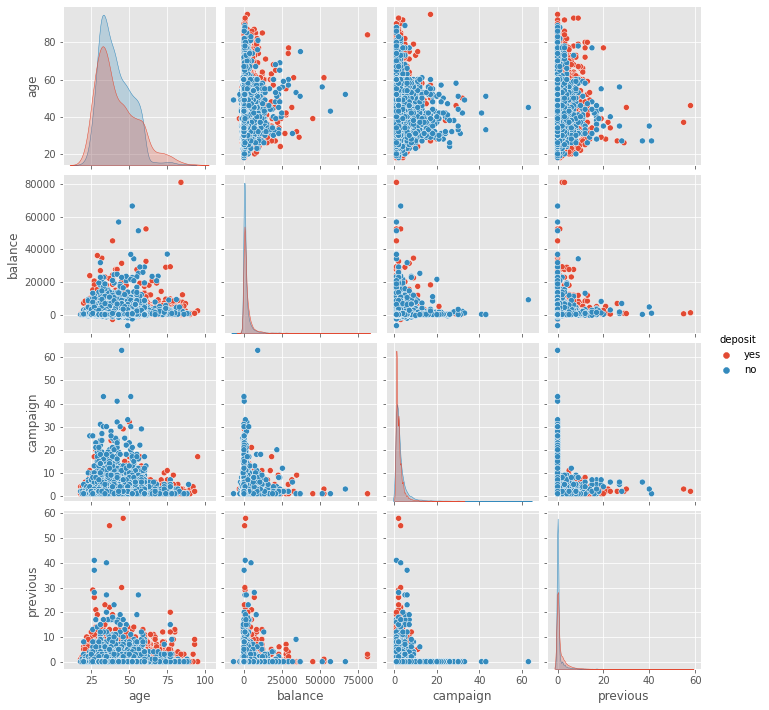

In [8]:
# Set Graph Size
plt.rcParams['figure.figsize'] = (16, 8)

# Visualize Pair Plot with Colors
sns.pairplot(data, hue='deposit')

no     5873
yes    5289
Name: deposit, dtype: int64


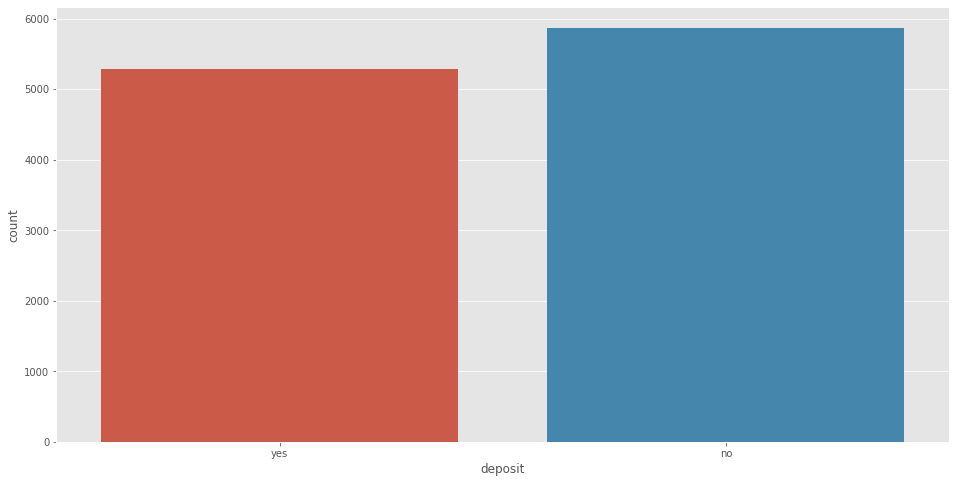

In [9]:
print(data.deposit.value_counts())
sns.countplot(x='deposit', data=data)

Terlihat pada histogram, bahwa tidak ditemukan indikasi imbalance *variabel*

## Label Encoder

Variabel categorical akan di encode dari yang tadinya berbentuk object berubah ke bentuk bilangan biner (1 atau 0)

In [10]:
deposit_valus ={'yes' : 1, 'no' : 0}
data['deposit'] = data['deposit'].map(lambda x: deposit_valus[x])
data['deposit'].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [11]:
deposit = data['deposit']

In [12]:
data.drop(['deposit'], axis = 1, inplace = True)

In [13]:
data.head()

,age,job,marital,education,balance,housing,loan,campaign,previous,poutcome
0,59,admin.,married,secondary,2343,yes,no,1,0,unknown
1,56,admin.,married,secondary,45,no,no,1,0,unknown
2,41,technician,married,secondary,1270,yes,no,1,0,unknown
3,55,services,married,secondary,2476,yes,no,1,0,unknown
4,54,admin.,married,tertiary,184,no,no,2,0,unknown


In [14]:
data.shape

(11162, 10)

In [15]:
deposit.head(5)

0    1
1    1
2    1
3    1
4    1
Name: deposit, dtype: int64

In [16]:
y= deposit

## Split Test dan Train 

Membuat test data dan train data dengan komposisi (2 : 8)

In [17]:
#splitting the data 
x_train, le_x_test, y_train, le_y_test = model_selection.train_test_split(data, y, test_size=0.2, random_state=0)
le_x_train, le_x_cv, le_y_train, le_y_cv = model_selection.train_test_split(x_train, y_train, test_size=0.2)

In [18]:
print("the shape of x_train data,{} and shape of x_test data {}:".format(le_x_train.shape,le_x_test.shape))
print("the shape of y_train data,{} and shape of y_test data {}:".format(le_y_train.shape,le_y_test.shape))
print("the shape of x_cv data,{} and shape of y_cv data {}:".format(le_x_cv.shape,le_y_cv.shape))

the shape of x_train data,(7143, 10) and shape of x_test data (2233, 10):
the shape of y_train data,(7143,) and shape of y_test data (2233,):
the shape of x_cv data,(1786, 10) and shape of y_cv data (1786,):


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
le.fit(data['job'])
le_x_train.job = le.transform(le_x_train.job)
le_x_test.job = le.transform(le_x_test.job)
le_x_cv.job = le.transform(le_x_cv.job)
le = LabelEncoder()

In [21]:
le.fit(data['marital'])
le_x_train.marital = le.transform(le_x_train.marital)
le_x_test.marital = le.transform(le_x_test.marital)
le_x_cv.marital = le.transform(le_x_cv.marital)
le = LabelEncoder()
le.fit(data['education'])
le_x_train.education = le.transform(le_x_train.education)
le_x_test.education = le.transform(le_x_test.education)
le_x_cv.education = le.transform(le_x_cv.education)

le = LabelEncoder()
le.fit(data['housing'])
le_x_train.housing = le.transform(le_x_train.housing)
le_x_test.housing = le.transform(le_x_test.housing)
le_x_cv.housing = le.transform(le_x_cv.housing)
import warnings
warnings.filterwarnings("ignore")
le = LabelEncoder()
le.fit(data['loan'])
le_x_train.loan = le.transform(le_x_train.loan)
le_x_test.loan = le.transform(le_x_test.loan)
le_x_cv.loan = le.transform(le_x_cv.loan)
le.fit(data['poutcome'])
le_x_train.poutcome = le.transform(le_x_train.poutcome)
le_x_test.poutcome = le.transform(le_x_test.poutcome)
le_x_cv.poutcome = le.transform(le_x_cv.poutcome)
le_x_train.head(2)

,age,job,marital,education,balance,housing,loan,campaign,previous,poutcome
4023,47,6,1,2,1011,0,0,1,0,3
8270,33,4,2,2,3770,0,0,2,0,3


# Machine Learning Models

## **K-nearest neighbors (KNN) Classifier**

Modeliing KNN

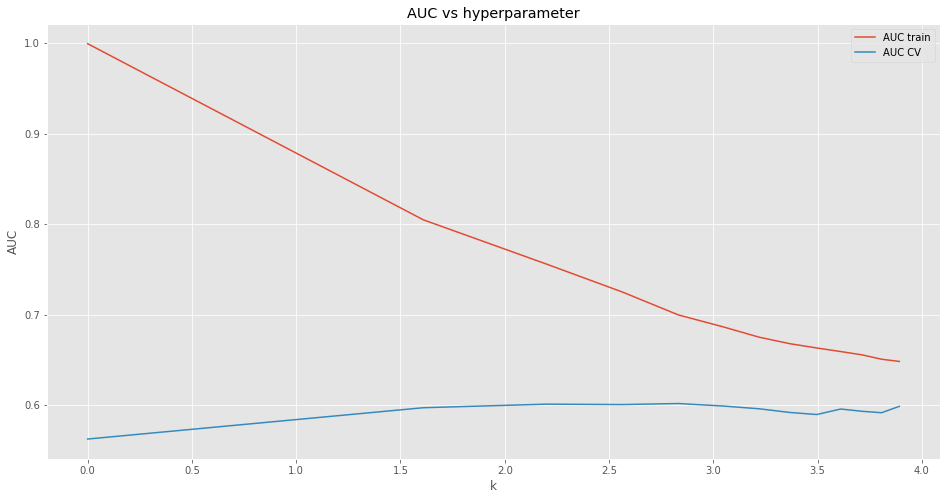

optimal alpha for which auc is maximum :  17


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import math

k = list(range(1,50,4))

train_auc = []
cv_auc = []

for i in k:
    clf = KNeighborsClassifier(n_neighbors = i,algorithm='brute')
    clf.fit(le_x_train,le_y_train)
    prob_cv = clf.predict_proba(le_x_cv)[:,1]
    cv_auc.append(roc_auc_score(le_y_cv,prob_cv))
    prob_train = clf.predict_proba(le_x_train)[:,1]
    train_auc.append(roc_auc_score(le_y_train,prob_train))
optimal_k = k[cv_auc.index(max(cv_auc))]
k = [math.log(x) for x in k]

#plot auc vs alpha
x = plt.subplot( )
x.plot(k, train_auc, label='AUC train')
x.plot(k, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('k')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal alpha for which auc is maximum : ',optimal_k)

Model Evaluation KNN

In [23]:
from sklearn.metrics import confusion_matrix

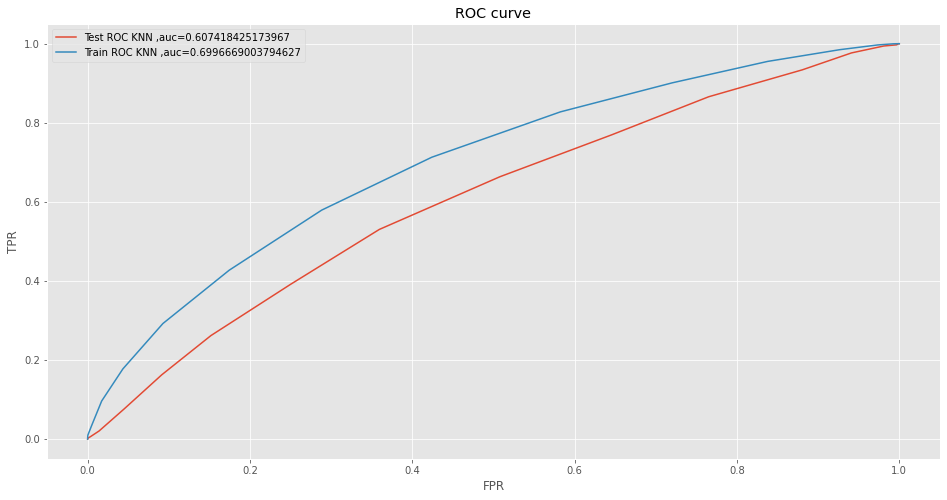

AUC on Test data is 0.607418425173967
AUC on Train data is 0.6996669003794627
---------------------------


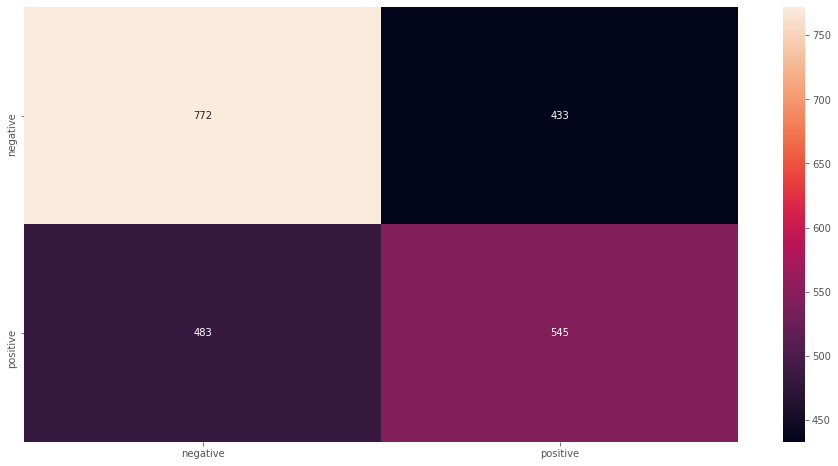

In [24]:
#Testing AUC on Test data
clf = KNeighborsClassifier(n_neighbors = optimal_k,algorithm='brute')
clf.fit(le_x_train,le_y_train)
pred_test = clf.predict_proba(le_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(le_y_test, pred_test)
pred_train = clf.predict_proba(le_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(le_y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC KNN ,auc='+str(roc_auc_score(le_y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC KNN ,auc='+str(roc_auc_score(le_y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=5)
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(le_y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(le_y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(le_y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [25]:
results=pd.DataFrame(columns=['model', 'Classifier' ,"hyper perameter", 'Train-AUC', 'Test-AUC' ])

In [26]:
new = ['KNN with kd-tree','KNeighborsClassifier',"k = 49",0.6403,0.5901]
results.loc[1] = new

## **Linear Support Vector Machine (SVM)**

Modelling Linear SVM

In [27]:
import warnings
warnings.filterwarnings("ignore")

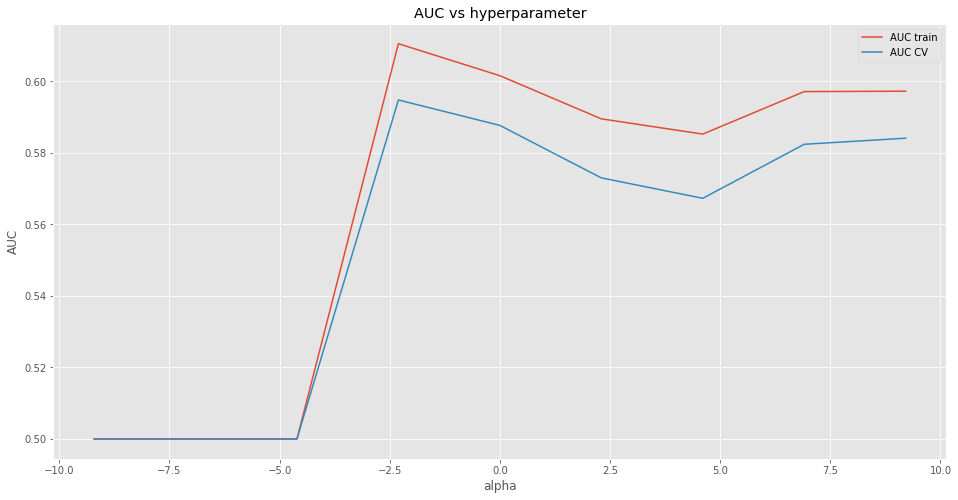

optimal alpha for which auc is maximum :  0.1


In [28]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
import math

alpha = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001]

train_auc = []
cv_auc = []

for i in alpha:
    model = SGDClassifier(alpha=i, loss = "hinge") 
    clf = CalibratedClassifierCV(model, cv=3)
    clf.fit(le_x_train,le_y_train)
    prob_cv = clf.predict_proba(le_x_cv)[:,1]
    cv_auc.append(roc_auc_score(le_y_cv,prob_cv))
    prob_train = clf.predict_proba(le_x_train)[:,1]
    train_auc.append(roc_auc_score(le_y_train,prob_train))
optimal_alpha= alpha[cv_auc.index(max(cv_auc))]
alpha=[math.log(x) for x in alpha]

#plot auc vs alpha
x = plt.subplot( )
x.plot(alpha, train_auc, label='AUC train')
x.plot(alpha, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('alpha')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal alpha for which auc is maximum : ',optimal_alpha)

Model Evaluation SVM

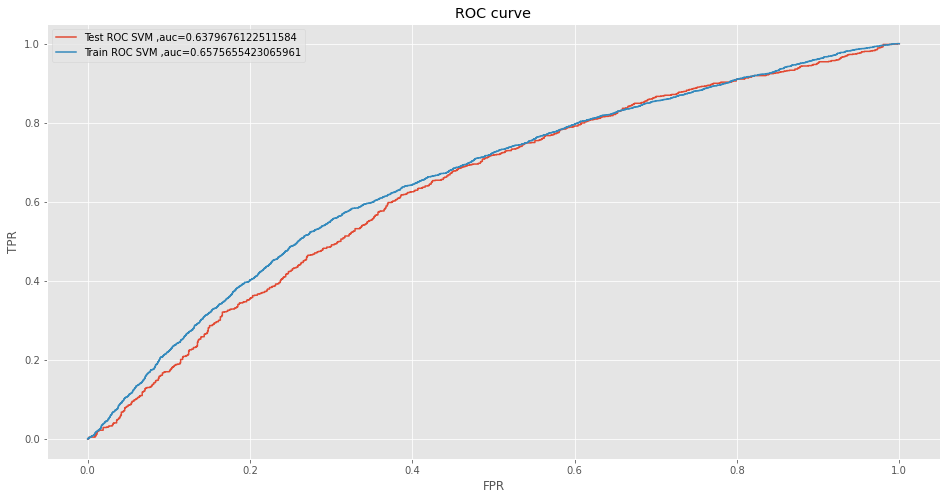

AUC on Test data is 0.6379676122511584
AUC on Train data is 0.6575655423065961
---------------------------


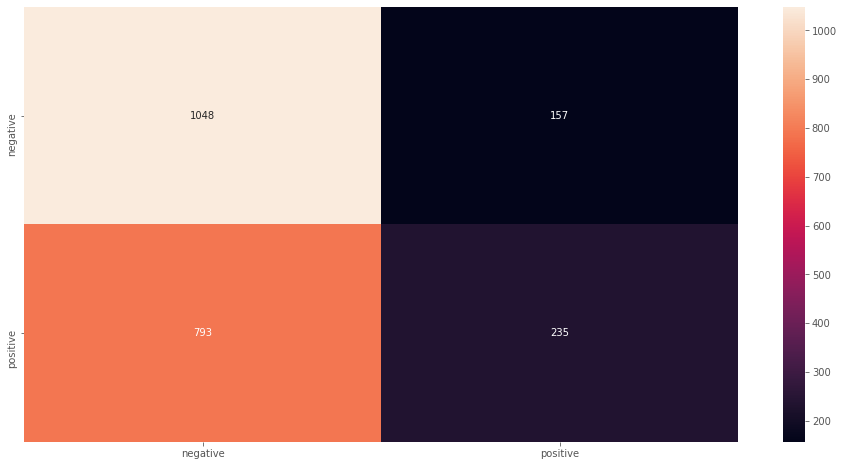

In [58]:
#Testing AUC on Test data
model = SGDClassifier(alpha = optimal_alpha)
clf = CalibratedClassifierCV(model, cv=3)
clf.fit(le_x_train,le_y_train)
pred_test = clf.predict_proba(le_x_test)[:,1]
fpr3, tpr3, thresholds3 = metrics.roc_curve(le_y_test, pred_test)
pred_train = clf.predict_proba(le_x_train)[:,1]
fpr4,tpr4,thresholds4 = metrics.roc_curve(le_y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr3, tpr3, label ='Test ROC SVM ,auc='+str(roc_auc_score(le_y_test,pred_test)))
x.plot(fpr4, tpr4, label='Train ROC SVM ,auc='+str(roc_auc_score(le_y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=5)
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(le_y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(le_y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(le_y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [30]:
all_features = x_train.columns
clf = SGDClassifier(alpha=0.01)
clf.fit(le_x_train,le_y_train)
weight = clf.coef_
positive_index=np.argsort(weight)[:,::-1]

negative_index=np.argsort(weight)

print('Top 10 subscribed features :')
for i in list(positive_index[0][0:10]):
    print(all_features[i])
    
print("----------------")

#top 10 negative features
print('Top 10 not subscribed features :')
for i in list(negative_index[0][0:10]):
    print(all_features[i])

Top 10 subscribed features :
previous
job
education
marital
age
balance
loan
poutcome
housing
campaign
----------------
Top 10 not subscribed features :
campaign
housing
poutcome
loan
balance
age
marital
education
job
previous


In [31]:
new = ['Linear SVM','SGDClassifier',"alpha = 1",0.6002,0.5874]
results.loc[2] = new

## **Decision tree Classifier**

Modelling Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
min_samples =  [5, 10, 100, 500]


param_grid={'min_samples_split':min_samples , 'max_depth':dept}
clf = DecisionTreeClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(le_x_train,le_y_train)
print("optimal min_samples_split",model.best_estimator_.min_samples_split)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal min_samples_split 500
optimal max_depth 10


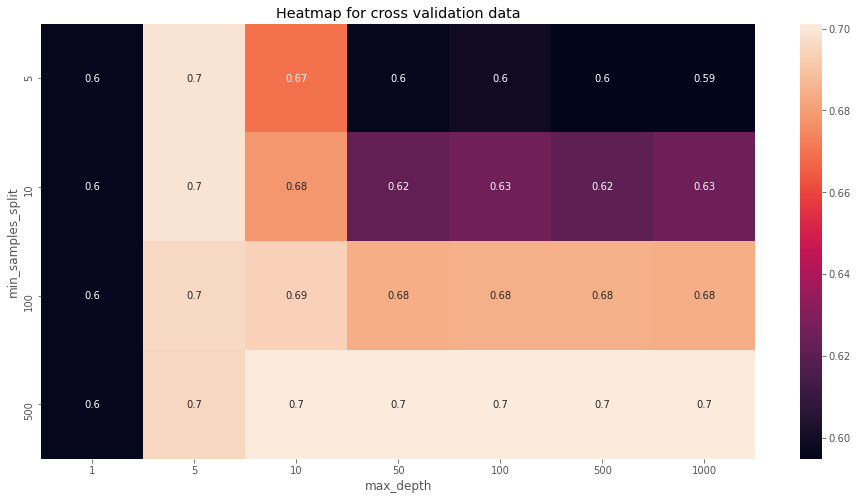

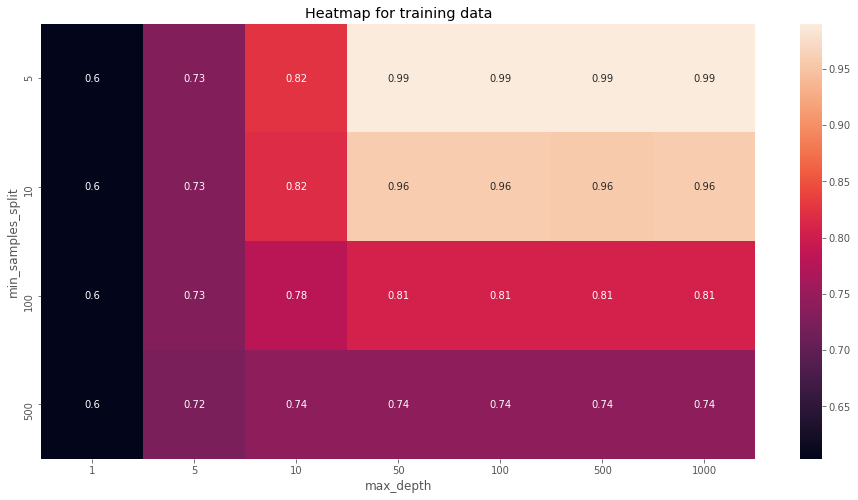

In [33]:
import seaborn as sns
X = []
Y = []
cv_auc = []
train_auc = []
for n in min_samples:
    for d in dept:
        clf = DecisionTreeClassifier(max_depth = d,min_samples_split = n)
        clf.fit(le_x_train,le_y_train)
        pred_cv = clf.predict_proba(le_x_cv)[:,1]
        pred_train = clf.predict_proba(le_x_train)[:,1]
        X.append(n)
        Y.append(d)
        cv_auc.append(roc_auc_score(le_y_cv,pred_cv))
        train_auc.append(roc_auc_score(le_y_train,pred_train))
        
#Heatmap for cross validation data        
data = pd.DataFrame({'min_samples_split': X, 'max_depth': Y, 'AUC': cv_auc})
data_pivoted = data.pivot("min_samples_split", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross validation data')
plt.show()

#Heatmap for training data
data = pd.DataFrame({'min_samples_split': X, 'max_depth': Y, 'AUC': train_auc})
data_pivoted = data.pivot("min_samples_split", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for training data')
plt.show()

Model Evaluation Decision Tree

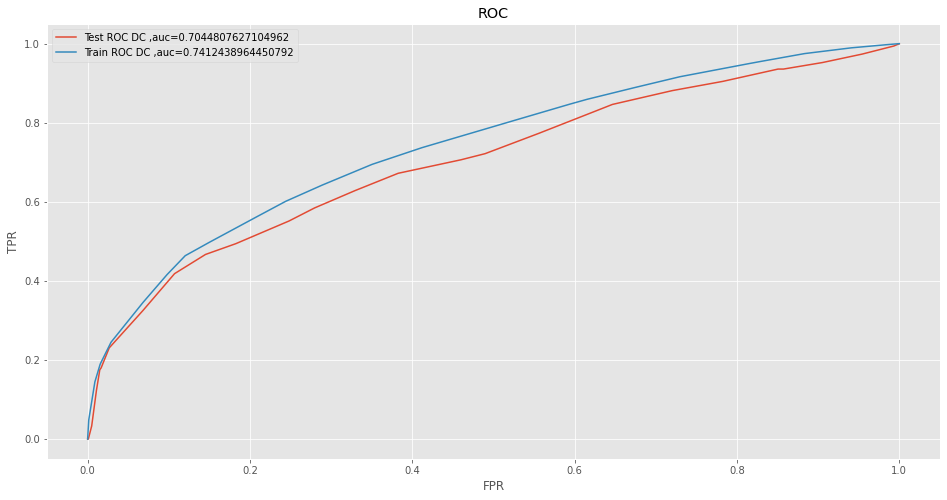

AUC on Test data is 0.7044807627104962
AUC on Train data is 0.7412438964450792
---------------------------


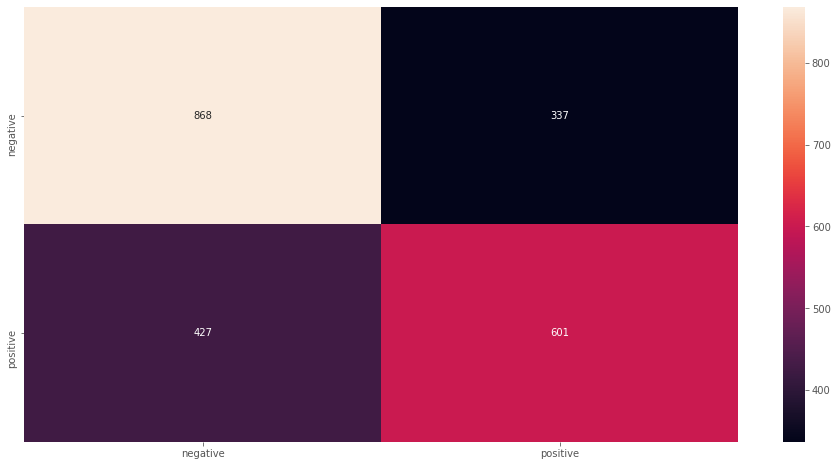

In [53]:
#training our model for max_depth=50,min_samples_split=500
clf = DecisionTreeClassifier(max_depth = 10,min_samples_split = 500)
clf.fit(le_x_train,le_y_train)
pred_test =clf.predict_proba(le_x_test)[:,1]
fpr5, tpr5, thresholds5 = metrics.roc_curve(le_y_test, pred_test)
pred_train = clf.predict_proba(le_x_train)[:,1]
fpr6,tpr6,thresholds6=metrics.roc_curve(le_y_train,pred_train)

#ROC curve
x = plt.subplot( )
x.plot(fpr5, tpr5, label='Test ROC DC ,auc='+str(roc_auc_score(le_y_test,pred_test)))
x.plot(fpr6, tpr6, label='Train ROC DC ,auc='+str(roc_auc_score(le_y_train,pred_train)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=5)
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(le_y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(le_y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(le_y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [35]:
#Top important features
all_features = x_train.columns

feat = clf.feature_importances_
features = np.argsort(feat)[::-1]
for i in features[0:20]:
    print(all_features[i])

previous
housing
poutcome
age
balance
education
campaign
marital
loan
job


In [36]:
new = ['Decision Tree','DecisionTreeClassifier',"max_depth = 10 & min_samples_split = 500",0.8131,0.7925]
results.loc[3] = new

## **Random Forest Classifier**

Modelling Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]


param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = RandomForestClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(le_x_train,le_y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal n_estimators 80
optimal max_depth 5


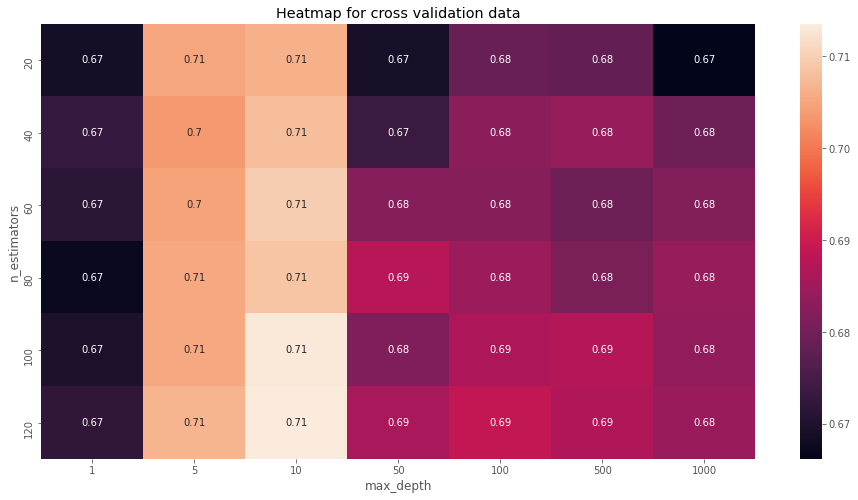

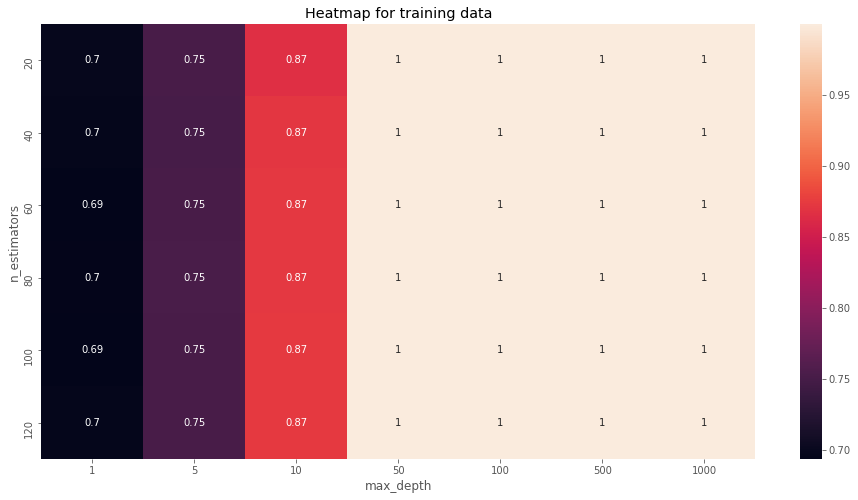

In [38]:
import seaborn as sns
X = []
Y = []
cv_auc = []
train_auc = []
for n in n_estimators:
    for d in dept:
        clf = RandomForestClassifier(max_depth = d,n_estimators = n)
        clf.fit(le_x_train,le_y_train)
        pred_cv = clf.predict_proba(le_x_cv)[:,1]
        pred_train = clf.predict_proba(le_x_train)[:,1]
        X.append(n)
        Y.append(d)
        cv_auc.append(roc_auc_score(le_y_cv,pred_cv))
        train_auc.append(roc_auc_score(le_y_train,pred_train))
        
#Heatmap for cross validation data        
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': cv_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross validation data')
plt.show()

#Heatmap for training data
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': train_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for training data')
plt.show()

In [39]:
optimal_n_estimators = model.best_estimator_.n_estimators
optimal_max_depth = model.best_estimator_.max_depth

Model Evaluation random Forest

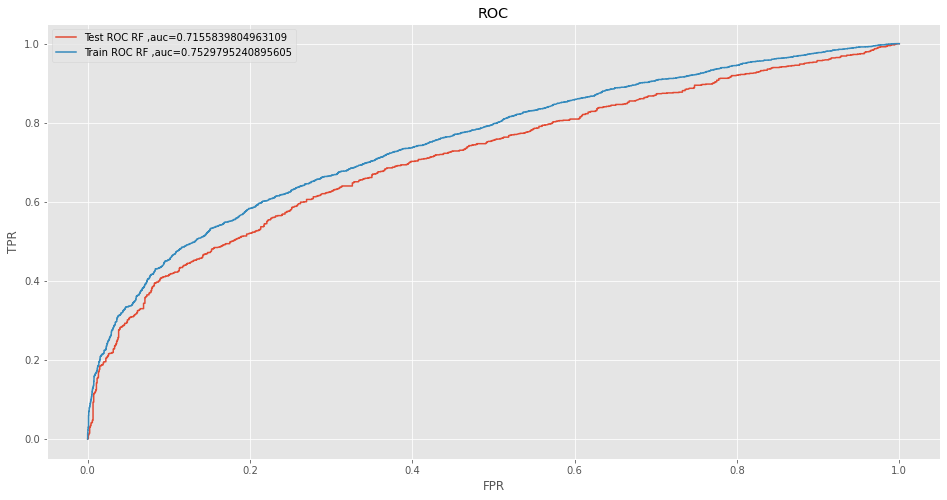

AUC on Test data is 0.7155839804963109
AUC on Train data is 0.7529795240895605
---------------------------


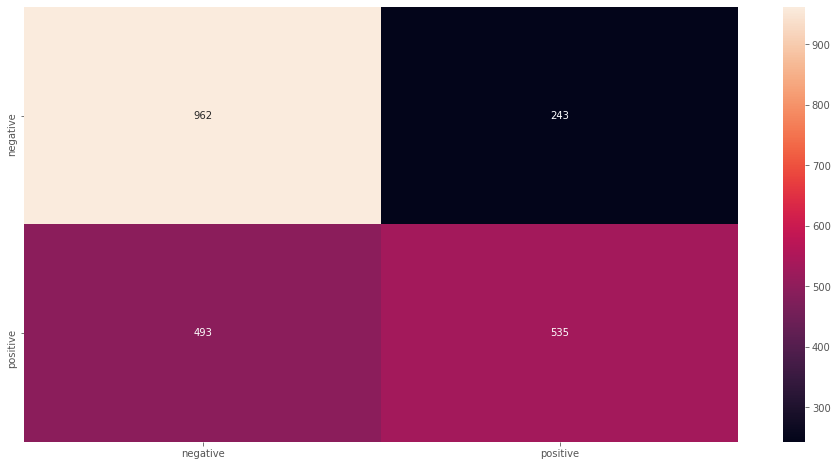

In [54]:
#training our model for max_depth=10,n_estimators = 120
clf = RandomForestClassifier(max_depth = optimal_max_depth,n_estimators = optimal_n_estimators)
clf.fit(le_x_train,le_y_train)
pred_test =clf.predict_proba(le_x_test)[:,1]
fpr7, tpr7, thresholds7 = metrics.roc_curve(le_y_test, pred_test)
pred_train = clf.predict_proba(le_x_train)[:,1]
fpr8,tpr8,thresholds8=metrics.roc_curve(le_y_train,pred_train)

#ROC curve
x = plt.subplot( )
x.plot(fpr7, tpr7, label='Test ROC RF ,auc='+str(roc_auc_score(le_y_test,pred_test)))
x.plot(fpr8, tpr8, label='Train ROC RF ,auc='+str(roc_auc_score(le_y_train,pred_train)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=5)
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(le_y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(le_y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(le_y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [41]:
new = ['Random Forest','RandomForestClassifier',"max_depth = 10 & min_samples_split = 100",0.8650, 0.8035]
results.loc[4] = new

# **Model Comparison**

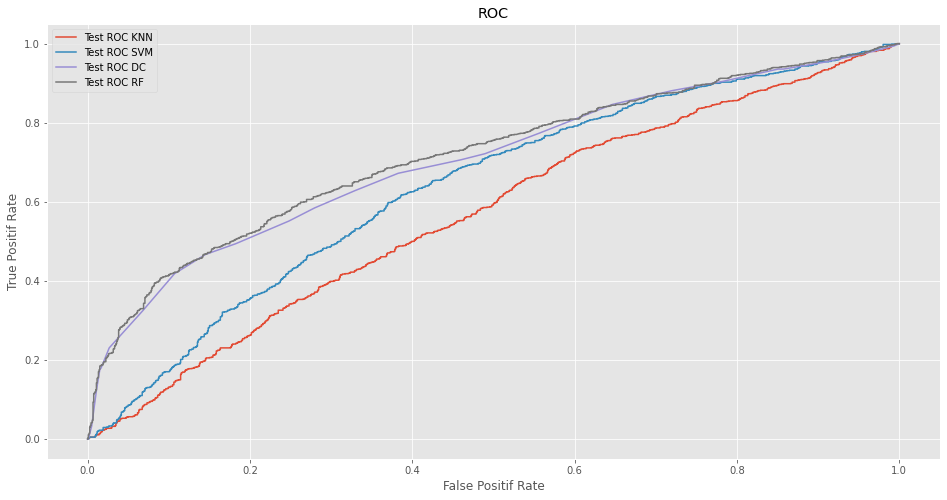

In [61]:
#Compare ROC Curve Test
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC KNN')
x.plot(fpr3, tpr3, label ='Test ROC SVM')
x.plot(fpr5, tpr5, label='Test ROC DC')
x.plot(fpr7, tpr7, label='Test ROC RF')
plt.title('ROC')
plt.xlabel('False Positif Rate')
plt.ylabel('True Positif Rate')
plt.legend(loc=5)
x.legend()
plt.show()

In [43]:
results

,model,Classifier,hyper perameter,Train-AUC,Test-AUC
1,KNN with kd-tree,KNeighborsClassifier,k = 49,0.6403,0.5901
2,Linear SVM,SGDClassifier,alpha = 1,0.6002,0.5874
3,Decision Tree,DecisionTreeClassifier,max_depth = 10 & min_samples_split = 500,0.8131,0.7925
4,Random Forest,RandomForestClassifier,max_depth = 10 & min_samples_split = 100,0.8650,0.8035


#Conclusion 

Berdasarkan kurva ROC maka dapat dilihat bahwa pemodelan dengan Random Forest Classifier menunjukan pemodelan paling baik karena paling jauh dari garis linear kurva


Pemodelan dengan KNN, Linear SVM< Decision Tree dan Random Forest dengan hyperparmeter tunning memberikan hasil akurasi/ AUC pada test data dengan nilai 0.5901, 0.5874, 0.7925, dan 0.8035 secara berurutan

**Pemodelan terbaik, Random Forest menghasilkan akurasi 0.8650 pada train data dan 0.8035 pada test data**.